<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> Calculo Cientifico MAT2605</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 2: Metodos Iterativos Basicos</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def metodo_de_Jacobi(A, b, x0, max_iter=100, tol=1e-8):
    """
    Resuelve el sistema Ax = b usando el método de Jacobi.
    Input: A, b
    Output: x
    """
    x = x0.copy()
    residuals = []
    n= x.size
    D = np.diag(np.diag(A))
    Dinv = np.diag(1/np.diag(A))
    
    for k in range(max_iter):
        residual = b - np.dot(A, x)
        norm_residual = np.linalg.norm(residual)
        residuals.append(norm_residual)

        # print(f"   {k+1}      | {norm_residual:.6f}")

        if norm_residual < tol:
            print(f"   {k+1}      | {norm_residual:.6f}")
            print("\nConvergencia alcanzada.")
            return x, residuals
        x= x+Dinv.dot(-A.dot(x) +b) 
    print(f"   {k+1}      | {norm_residual:.6f}")
    print("\nNúmero máximo de iteraciones alcanzado.")
    return x, residuals

In [91]:
def metodo_de_GaussSeidel(A, b, x0, max_iter=100, tol=1e-8):
    """
    Resuelve el sistema Ax = b usando el método de Gauss Seidel.
    Input: A, b
    Output: x
    """
    x = x0.copy()
    
    residuals = []
    n= x.size
    
    for k in range(max_iter):
        residual = b - np.dot(A, x)
        norm_residual = np.linalg.norm(residual)
        residuals.append(norm_residual)

        # print(f"   {k+1}      | {norm_residual:.6f}")

        if norm_residual < tol:
            print(f"   {k+1}      | {norm_residual:.6f}")
            print("\nConvergencia alcanzada.")
            return x, residuals
        xnew = np.zeros(n)
        for i in range(n):
            if i == 0:
                xnew[i] = (1.0/A[i,i])*(b[i] -  A[i,i+1:].dot(x[i+1:]) )
            elif i == n-1:
                xnew[i] = (1.0/A[i,i])*(b[i] -  A[i,:i+1].dot(xnew[:i+1]) )
            else:
                xnew[i] = (1.0/A[i,i])*(b[i] - A[i,:i].dot(xnew[:i]) -  A[i,i+1:].dot(x[i+1:])  )
        
        x[:] = xnew[:]
    print(f"   {k}      | {norm_residual:.6f}")
    print("\nNúmero máximo de iteraciones alcanzado.")
    return x, residuals

In [92]:
def metodo_de_SOR(A, b, x0, w=1.0, max_iter=100, tol=1e-8):
    """
    Resuelve el sistema Ax = b usando el método de SOR.
    Input: A, b
    Output: x
    """
    x = x0.copy(); n= x.size
    residuals = []
    for k in range(max_iter):
        residual = b - np.dot(A, x)
        norm_residual = np.linalg.norm(residual)
        residuals.append(norm_residual)
        if norm_residual < tol:
            print(f"   {k+1}      | {norm_residual:.6f}")
            print("\nConvergencia alcanzada.")
            return x, residuals
        xnew = np.zeros(n)
        for i in range(n):
            if i == 0:
                xnew[i] = (1.0-w)*x[i] + (w*1.0/A[i,i])*(b[i] -  A[i,i+1:].dot(x[i+1:]) )
            elif i == n-1:
                xnew[i] = (1.0-w)*x[i] + (w*1.0/A[i,i])*(b[i] -  A[i,:i+1].dot(xnew[:i+1]) )
            else:
                xnew[i] = (1.0-w)*x[i] + (w*1.0/A[i,i])*(b[i] - A[i,:i].dot(xnew[:i]) -  A[i,i+1:].dot(x[i+1:])  )
        x[:] = xnew[:]
    print(f"   {k}      | {norm_residual:.6f}")
    print("\nNúmero máximo de iteraciones alcanzado.")
    return x, residuals

In [47]:
A = np.array([[7,-4],[-8,9]])
b = np.array([3,-4])
x0 = np.array([-1.0,3.0])
x = metodo_de_Jacobi(A,b,x0)
x = metodo_de_GaussSeidel(A,b,x0)
x = metodo_de_SOR(A,b,x0, w=1.02)

   67      | 0.000000

Convergencia alcanzada.
   32      | 0.000000

Convergencia alcanzada.
   100      | 0.023715

Número máximo de iteraciones alcanzado.


In [19]:
# Ejemplo

In [34]:
A = np.array([[1.0, 0.5,0.5],[0.5,1.0,0.5],[0.5,0.5,1.0]])
b = np.array([1.0,-.1,0.0])
x = metodo_de_Jacobi(A,b,np.ones(3))
x = metodo_de_GaussSeidel(A,b,np.ones(3))

   100      | 2.944486

Número máximo de iteraciones alcanzado.
   100      | 0.180000

Número máximo de iteraciones alcanzado.


# Ejemplo 1:

\begin{equation}
A = 
\begin{bmatrix}
1 & 1/2 & 1/2 \\
1/2 & 1 & 1/2 \\
1/2 & 1/2 & 1
\end{bmatrix}
\end{equation}


In [21]:
A = np.array([[1,1/2,1/2],[1/2,1,1/2],[1/2,1/2,1]],dtype = np.float64)
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)
print(" D:\n", D,"\n L:\n", L,"\n U:\n", U)

 D:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 
 L:
 [[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 0.5 0. ]] 
 U:
 [[0.  0.5 0.5]
 [0.  0.  0.5]
 [0.  0.  0. ]]


## Metodo de Jacobi

In [4]:
# Matriz e iteracion de Jacobi
T_J = -np.linalg.inv(D)@ (L+U)
print("T_J:\n",T_J)

T_J:
 [[ 0.  -0.5 -0.5]
 [-0.5  0.  -0.5]
 [-0.5 -0.5  0. ]]


In [5]:
# % spectral radius condition
rho_J = max(abs(np.linalg.eigvals(T_J)))
print(" rho_J = ", rho_J, "==> no converge!")

 rho_J =  0.9999999999999998 ==> no converge!


## Metodo de Gauss Seidel

In [6]:
# Matriz e iteracion de Gauss-Seidel
T_G = -np.linalg.inv(D+L)@ (U)
print("T_G:\n",T_G)

T_G:
 [[ 0.    -0.5   -0.5  ]
 [ 0.     0.25  -0.25 ]
 [ 0.     0.125  0.375]]


In [7]:
# % spectral radius condition
rho_G = max(abs(np.linalg.eigvals(T_G)))
print(" rho_J = ", rho_G, "==> converge!")

 rho_J =  0.3535533905932738 ==> converge!


# Ejemplo 2:

\begin{equation}
A = 
\left(
\begin{array}{ccc}
1 & 2 & -2 \\
1 & 1 & 1 \\
2 & 2 & 1
\end{array}
\right)
\end{equation}

In [8]:
A = np.array([[1,2,-2],[1,1,1],[2,2,1]],dtype = np.float64)
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)
#print(" D:\n", D,"\n L:\n", L,"\n U:\n", U)

## Metodo de Jacobi

In [9]:
# Matriz e iteracion de Jacobi
T_J = -np.linalg.inv(D)@ (L+U)

print("T_J:\n",T_J)
# % spectral radius condition
rho_J = max(abs(np.linalg.eigvals(T_J)))
print(" rho_J = ", rho_J, "==> converge!")

T_J:
 [[ 0. -2.  2.]
 [-1.  0. -1.]
 [-2. -2.  0.]]
 rho_J =  1.080934114523089e-05 ==> converge!


## Metodod de Gauss-Seidel

In [10]:
# Matriz e iteracion de Gauss-Seidel
T_G = -np.linalg.inv(D+L)@ (U)
print("T_G:\n",T_G)
# % spectral radius condition
rho_G = max(abs(np.linalg.eigvals(T_G)))
print(" rho_G = ", rho_G, "==> no converge!")

T_G:
 [[ 0. -2.  2.]
 [ 0.  2. -3.]
 [ 0.  0.  2.]]
 rho_G =  2.0 ==> no converge!


# Ejemplo 3


\begin{equation}
A = 
\left(
\begin{array}{ccc}
4 & 3 & 0 \\
3 & 4 & -1 \\
0 & -1 & 4
\end{array}
\right)
\end{equation}

In [35]:
A = np.array([[4,3,0],[3,4,-1],[0,-1,4]],dtype = np.float64)
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)
#print(" D:\n", D,"\n L:\n", L,"\n U:\n", U)

### Metodo de Jacobi

In [87]:
# Matriz e iteracion de Jacobi
T_J = -np.linalg.inv(D)@ (L+U)

print("T_J:\n",T_J)
# % spectral radius condition
rho_J = max(abs(np.linalg.eigvals(T_J)))
print(" rho_J = ", rho_J,np.sqrt(5.0/8.0), "==> converge!")



T_J:
 [[ 0.   -0.75  0.  ]
 [-0.75  0.    0.25]
 [ 0.    0.25  0.  ]]
 rho_J =  0.790569415042095 0.7905694150420949 ==> converge!


### Metodo de Gauss Seidel

In [37]:
# Matriz e iteracion de Gauss-Seidel
T_G = -np.linalg.inv(D+L)@ (U)
print("T_G:\n",T_G)
# % spectral radius condition
rho_G = max(abs(np.linalg.eigvals(T_G)))
print(" rho_G = ", rho_G, "==> converge!")

print("observe que rho_J =", rho_J, "y rho_J^2 = ", rho_J**2)

T_G:
 [[ 0.       -0.75      0.      ]
 [ 0.        0.5625    0.25    ]
 [ 0.        0.140625  0.0625  ]]
 rho_G =  0.625 ==> converge!
observe que rho_J = 0.790569415042095 y rho_J^2 =  0.6250000000000002


### Metodo de SOR

In [88]:
# Matriz e iteracion de Gauss-Seidel
T_SOR = lambda omega: np.linalg.inv(D+omega*L)@ ((1-omega)*D-omega*U)
print("T_SOR para omega = 1.2:\n",T_SOR(1.2))
# % spectral radius condition
rho_SOR = max(abs(np.linalg.eigvals(T_SOR(1.2))))
print(" rho_SOR = ", rho_SOR, " para omega = 1.2")

omega_opt = 2/(1+np.sqrt(1-rho_J**2))
print(omega_opt)
print("T_SOR para omega optimo :\n",T_SOR(omega_opt))
# % spectral radius condition
rho_SOR = max(abs(np.linalg.eigvals(T_SOR(omega_opt))))
print(" rho_SOR = ", rho_SOR, " para omega optimo")

T_SOR para omega = 1.2:
 [[-0.2   -0.9    0.   ]
 [ 0.18   0.61   0.3  ]
 [ 0.054  0.183 -0.11 ]]
 rho_SOR =  0.39999999999999986  para omega = 1.2
1.2404082057734578
T_SOR para omega optimo :
 [[-0.24040821 -0.93030615  0.        ]
 [ 0.22365323  0.62506134  0.31010205]
 [ 0.06935533  0.1938328  -0.14424492]]
 rho_SOR =  0.24040820577345784  para omega optimo


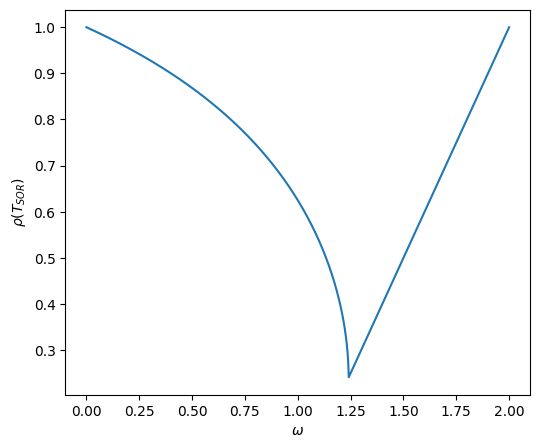

In [89]:
omegas = np.linspace(0,2,1000)
def rho_SOR(omega):
    T_SOR = np.linalg.inv(D+omega*L)@ ((1-omega)*D-omega*U)
    rho_SOR = max(abs(np.linalg.eigvals(T_SOR)))
    return rho_SOR

rhos = [rho_SOR(o) for o in omegas]

fig, ax = plt.subplots(figsize = (6,5))
ax.plot(omegas, rhos)
ax.set(xlabel="$\omega$",
       ylabel="$\\rho (T_{SOR})$")

plt.show()

In [93]:
x0 = np.array([1.0,1.0,1.0])
b = A.dot(np.array([2.0,1.0,-1.0]))
x = metodo_de_Jacobi(A,b,x0)
x = metodo_de_GaussSeidel(A,b,x0)
x = metodo_de_SOR(A,b,x0, w=1.2404)
print(A,b)

   89      | 0.000000

Convergencia alcanzada.
   41      | 0.000000

Convergencia alcanzada.
   18      | 0.000000

Convergencia alcanzada.
[[ 4.  3.  0.]
 [ 3.  4. -1.]
 [ 0. -1.  4.]] [11. 11. -5.]


In [16]:
from scipy.linalg import hilbert

In [17]:
A = hilbert(7)
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)

In [18]:
T_G = -np.linalg.inv(D+L)@ (U)
print("T_G:\n",T_G)
# % spectral radius condition
rho_G = max(abs(np.linalg.eigvals(T_G)))
print(" rho_G = ", rho_G, "==> converge!")

T_G:
 [[ 0.         -0.5        -0.33333333 -0.25       -0.2        -0.16666667
  -0.14285714]
 [ 0.          0.75       -0.25       -0.225      -0.2        -0.17857143
  -0.16071429]
 [ 0.         -0.10416667  0.86805556 -0.13541667 -0.13095238 -0.12400794
  -0.11656746]
 [ 0.         -0.05347222 -0.07939815  0.91048611 -0.09222222 -0.09143519
  -0.08900463]
 [ 0.         -0.03091518 -0.05174851 -0.06268973  0.93211735 -0.0698395
  -0.06996488]
 [ 0.         -0.01931396 -0.03564259 -0.04575497 -0.05160113  0.94525628
  -0.05618583]
 [ 0.         -0.01274214 -0.02557267 -0.03446362 -0.04022111 -0.04379935
   0.95410182]]
 rho_G =  0.999999935230031 ==> converge!


In [69]:
def GaussSeidel_mat(A,b,x0, max_iter=100, tol=1e-8):
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    T_G = -np.linalg.inv(D+L)@ (U)
    c = np.linalg.inv(D+L)@ (b)
    x = x0.copy()
    k = 0
    r = np.linalg.norm(A.dot(x)-b)
    while r>tol and k<max_iter:
        x = T_G.dot(x) + c
        r = np.linalg.norm(A.dot(x)-b)
        #print(k,r)
        k+=1
        print(x)
        print(f"   {k}      | {r:.6f}")
    return x
def SOR_mat(A,b,x0, w=1, max_iter=100, tol=1e-8):
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    T_SOR = np.linalg.inv(w*L+D)@ ((1-w)*D-w*U)
    c = np.linalg.solve(D+w*L,w*b)
    x = x0.copy()
    k = 0
    r = np.linalg.norm(A.dot(x)-b)
    while r>tol and k<max_iter:
        x = T_SOR.dot(x) + c
        r = np.linalg.norm(A.dot(x)-b)
        #print(k,r)
        k+=1
    print(f"   {k}      | {r:.6f}")
    return x

In [74]:
A = np.array([[7,-4],[-8,9]])
b = np.array([3,-4])
x0 = np.array([-1.0,3.0])
x = GaussSeidel_mat(A,b,x0)
x = SOR_mat(A,b,x0,w=1.2)

[2.14285714 1.46031746]
   1      | 6.158730
[1.26303855 0.67825649]
   2      | 3.128244
[0.81614656 0.28101917]
   3      | 1.588949
[0.58915381 0.07924783]
   4      | 0.807085
[ 0.4738559 -0.0232392]
   5      | 0.409948
[ 0.41529189 -0.0752961 ]
   6      | 0.208228
[ 0.38554509 -0.1017377 ]
   7      | 0.105766
[ 0.3704356  -0.11516836]
   8      | 0.053723
[ 0.36276094 -0.12199028]
   9      | 0.027288
[ 0.3588627  -0.12545538]
   10      | 0.013860
[ 0.35688264 -0.12721543]
   11      | 0.007040
[ 0.3558769  -0.12810942]
   12      | 0.003576
[ 0.35536604 -0.12856352]
   13      | 0.001816
[ 0.35510656 -0.12879417]
   14      | 0.000923
[ 0.35497476 -0.12891132]
   15      | 0.000469
[ 0.35490782 -0.12897083]
   16      | 0.000238
[ 0.35487381 -0.12900106]
   17      | 0.000121
[ 0.35485654 -0.12901641]
   18      | 0.000061
[ 0.35484777 -0.12902421]
   19      | 0.000031
[ 0.35484331 -0.12902817]
   20      | 0.000016
[ 0.35484105 -0.12903018]
   21      | 0.000008
[ 0.3548399

In [86]:
A = np.array([[4,3,0],[3,4,-1],[0,-1,4]],dtype = np.float64)
x0 = np.array([1.0,1.0,1.0])
b = A.dot(np.array([2.0,1.0,-1.0]))
# x = metodo_de_Jacobi(A,b,x0, max_iter=10)
# x = metodo_de_GaussSeidel(A,b,x0, max_iter=10)
# x = GaussSeidel_mat(A,b,x0, max_iter=10)
x = SOR_mat(A,b,x0,w=1.2,max_iter=10)
x = metodo_de_SOR(A,b,x0,w=1.2,max_iter=11)

   10      | 0.000455
   0      | 10.246951
   1      | 3.614522
   2      | 1.198666
   3      | 0.177911
   4      | 0.133071
   5      | 0.039782
   6      | 0.018606
   7      | 0.006901
   8      | 0.002869
   9      | 0.001126
   10      | 0.000455

Número máximo de iteraciones alcanzado.
